### Formating the data

In [16]:
import pandas as pd
df=pd.read_csv('/content/bitcoin_2015-01-01_2025-01-01.csv',parse_dates=['Start'],index_col='Start').drop('End', axis=1)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,
2025-01-01,93650.83,95074.46,93070.57,94610.14,5.185988e+10,1.860687e+12
2024-12-31,92728.07,96016.01,92161.96,93647.01,7.535185e+10,1.856486e+12
2024-12-30,93610.59,94951.18,91603.06,92811.03,5.833191e+10,1.850688e+12
2024-12-29,95233.87,95272.03,93069.72,93659.56,3.566003e+10,1.872837e+12
2024-12-28,94394.88,95394.07,94098.12,95204.07,5.404795e+10,1.875426e+12


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2025-01-01 to 2015-01-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3654 non-null   float64
 1   High        3654 non-null   float64
 2   Low         3654 non-null   float64
 3   Close       3654 non-null   float64
 4   Volume      3654 non-null   float64
 5   Market Cap  3654 non-null   float64
dtypes: float64(6)
memory usage: 199.8 KB


In [18]:
df = df.drop(['Volume','Market Cap'],axis=1)

In [19]:
df.head()

,Open,High,Low,Close
Start,,,,
2025-01-01,93650.83,95074.46,93070.57,94610.14
2024-12-31,92728.07,96016.01,92161.96,93647.01
2024-12-30,93610.59,94951.18,91603.06,92811.03
2024-12-29,95233.87,95272.03,93069.72,93659.56
2024-12-28,94394.88,95394.07,94098.12,95204.07


In [20]:
df=df.sort_index(ascending=True)

In [21]:
df.tail()

,Open,High,Low,Close
Start,,,,
2024-12-28,94394.88,95394.07,94098.12,95204.07
2024-12-29,95233.87,95272.03,93069.72,93659.56
2024-12-30,93610.59,94951.18,91603.06,92811.03
2024-12-31,92728.07,96016.01,92161.96,93647.01
2025-01-01,93650.83,95074.46,93070.57,94610.14


In [22]:
bitcoin_prices=pd.DataFrame(df['Close']).rename(columns={"Close":"Price(USD)"})
bitcoin_prices.tail()

,Price(USD)
Start,
2024-12-28,95204.07
2024-12-29,93659.56
2024-12-30,92811.03
2024-12-31,93647.01
2025-01-01,94610.14


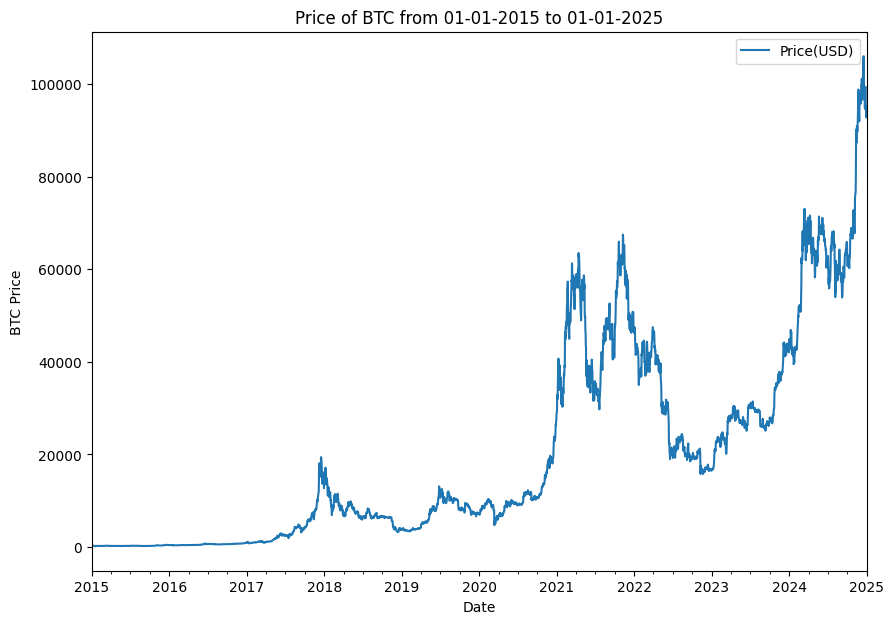

In [23]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of BTC from 01-01-2015 to 01-01-2025")
plt.show()

In [24]:
timestep=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices['Price(USD)'].to_numpy()
len(prices),len(timestep)

(3654, 3654)

In [25]:
split_size = int(0.8*len(prices)) # 80 % train,20 % test
#Create train data splits(everything before the split)
X_train,y_train=timestep[:split_size],prices[:split_size]
#Create test data splits(everything after the split)
X_test,y_test=timestep[split_size:],prices[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2923, 2923, 731, 731)

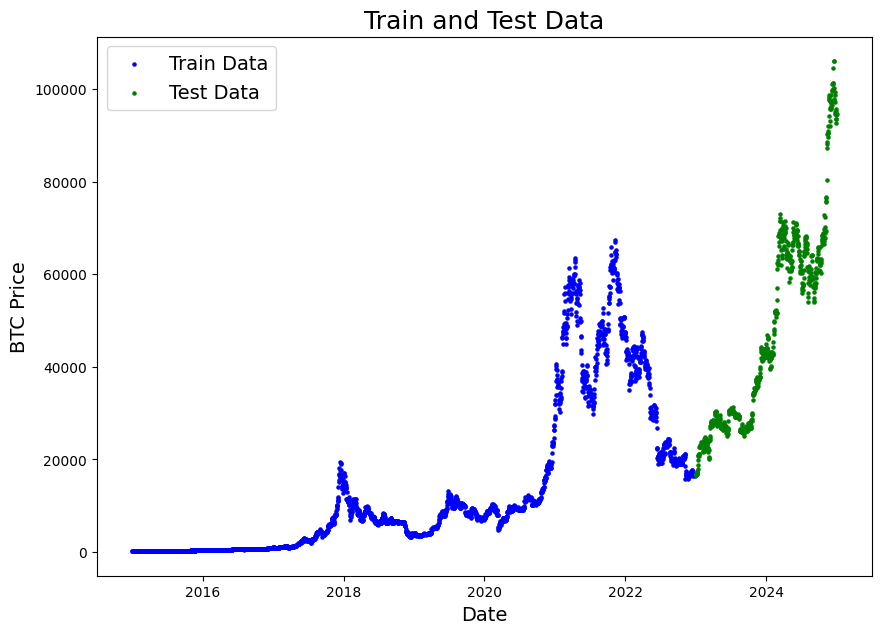

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,c='b',label='Train Data')
plt.scatter(X_test,y_test,s=5,c='g',label='Test Data')
plt.legend(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('BTC Price',fontsize=14)
plt.title('Train and Test Data',fontsize=18)
plt.show()

In [27]:
## Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timesteps
  values: array of values across time
  format:style of plot , default "."
  start: where to start the plot(setting a value will index from start of timesteps & values)
  end: where to end the plot(setting a value will index from end of timesteps & values)
  label: label to show on plot about the data
  """
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

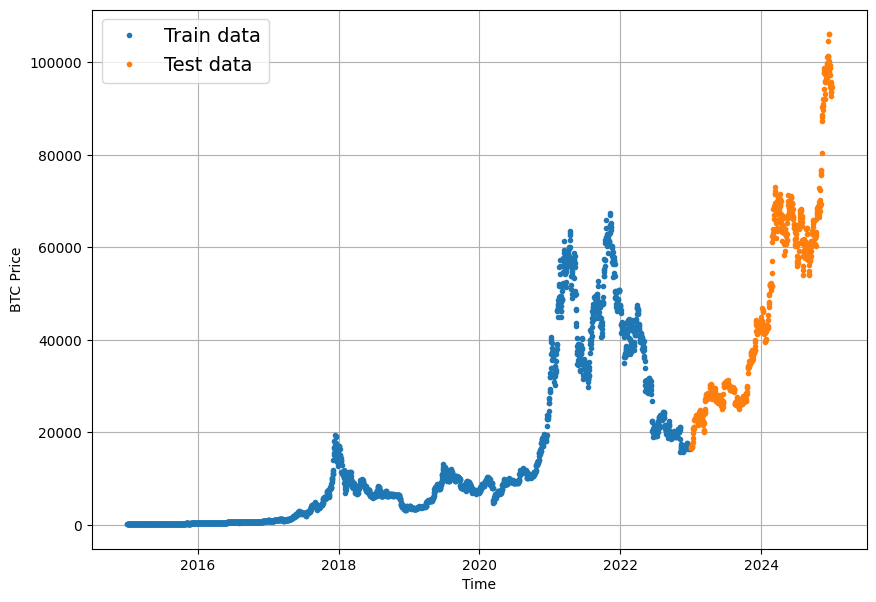

In [28]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plt.show()

### Model 0: Naive Forecast(Baseline)

The formula looks like this:
$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [29]:
## Crate a naive forecast
naive_forecast=y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([16677.44994353, 16675.90903725, 16857.28270944, 16828.8464    ,
        16953.97206658, 16944.5396    , 17070.57451148, 17194.77873457,
        17435.75164592, 17939.36249976]),
 array([95136.87, 94748.02, 98805.9 , 99436.  , 95830.42, 94452.57,
        95204.07, 93659.56, 92811.03, 93647.01]))

In [30]:
y_test[-10:]

array([94748.02, 98805.9 , 99436.  , 95830.42, 94452.57, 95204.07,
       93659.56, 92811.03, 93647.01, 94610.14])

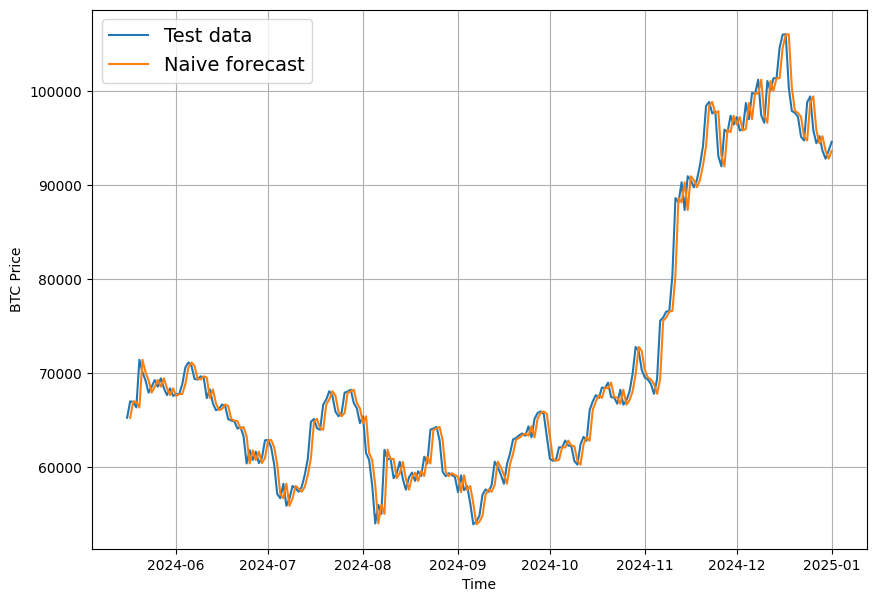

In [31]:
## Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=500,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=500,format="-",label="Naive forecast")
plt.show()

In [32]:
import tensorflow as tf

In [33]:
print(tf.__version__)

2.19.0


In [34]:
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  ## Find MAE of naive forecast(no seasonality)
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) ## our seasonality is 1 day(hence the shifting of 1 day)

  return mae/mae_naive_no_season

In [35]:
def evaluate_preds(y_true,y_pred):
  # Make sure float32 (for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  ## calculate various metrics
  mae=tf.keras.losses.MAE(y_true,y_pred)
  mse=tf.keras.losses.MSE(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.reduce_mean(tf.abs(y_true-y_pred)/y_true)*100
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [36]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': np.float32(876.2489),
 'mse': np.float32(1897833.8),
 'rmse': np.float32(1377.6189),
 'mape': np.float32(1.7562715),
 'mase': np.float32(0.99863255)}

In [37]:
print(tf.reduce_mean(y_test).numpy()) ## AVG price of bitcoin in test set.


47544.64203050916


With Baseline model,the prediction for price was off by $876.2489


## Formatting Data 2

In [38]:
HORIZON = 1 # Predict 1 step at a time
WINDOW_SIZE = 7 # Use 7 days of historical data

In [39]:
def get_labelled_windows(x,horizon=1):
  """
  Creates labels for windowed data.

  E.g. if horizon=1
  Input: [1,2,3,4,5,6] -> Output: ([1,2,3,4,5],[6])
  """
  return x[:,:-horizon],x[:,-horizon:]


In [40]:
test_windows,test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)
print(f"Window:{tf.squeeze(test_windows).numpy()} -> Label:{tf.squeeze(test_label).numpy()}")



Window:[1 2 3 4 5 6 7] -> Label:8


In [41]:
import numpy as np
def make_windows(x,window_size=7,horizon=1):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling )
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # 4. Get the labelled windows
  windows,labels = get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels


In [42]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
full_windows.shape,full_labels.shape

((3647, 7), (3647, 1))

In [43]:
for i in range(3):
  print(f"Window:{full_windows[i]} -> Label:{full_labels[i]}")

Window:[314.136 315.207 284.234 264.201 274.57  285.835 293.909] -> Label:[283.5]
Window:[315.207 284.234 264.201 274.57  285.835 293.909 283.5  ] -> Label:[290.408]
Window:[284.234 264.201 274.57  285.835 293.909 283.5   290.408] -> Label:[274.697]


In [44]:
for i in range(3):
  print(f"Window:{full_windows[i-3]} -> Label:{full_labels[i-3]}")

Window:[94748.02 98805.9  99436.   95830.42 94452.57 95204.07 93659.56] -> Label:[92811.03]
Window:[98805.9  99436.   95830.42 94452.57 95204.07 93659.56 92811.03] -> Label:[93647.01]
Window:[99436.   95830.42 94452.57 95204.07 93659.56 92811.03 93647.01] -> Label:[94610.14]


In [45]:
def make_train_test_splits(windows,labels,test_splits=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size=int(len(windows)* (1-test_splits)) # this will default to 80% train/20% test
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,train_labels,test_windows,test_labels

In [46]:
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2917, 2917, 730, 730)

In [47]:
test_windows[-5:],test_labels[-5:]

(array([[97253.03, 95136.87, 94748.02, 98805.9 , 99436.  , 95830.42,
         94452.57],
        [95136.87, 94748.02, 98805.9 , 99436.  , 95830.42, 94452.57,
         95204.07],
        [94748.02, 98805.9 , 99436.  , 95830.42, 94452.57, 95204.07,
         93659.56],
        [98805.9 , 99436.  , 95830.42, 94452.57, 95204.07, 93659.56,
         92811.03],
        [99436.  , 95830.42, 94452.57, 95204.07, 93659.56, 92811.03,
         93647.01]]),
 array([[95204.07],
        [93659.56],
        [92811.03],
        [93647.01],
        [94610.14]]))

In [48]:
np.array_equal(np.squeeze(train_labels),y_train[WINDOW_SIZE:])

False

In [49]:
import os

## Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):

  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name+".keras"),
                                            monitor="val_loss",

                                            save_best_only=True)

### Model 1 : Dense Model (windows=7,horizon=1)

In [50]:
import tensorflow as tf
from tensorflow.keras import layers

## Construct model
model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear") # linear activation is the same as having no activation
],name="model_1_dense") ## give the model a name so we can save it

## compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

## Fit Model
model_1.fit(x=train_windows,#train windows of 7 timesteps of Bitcoin price
            y=train_labels,#horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=80,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 7737.9468 - mae: 7737.9468 - val_loss: 5840.7437 - val_mae: 5840.7437
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1121.4496 - mae: 1121.4496 - val_loss: 1593.7118 - val_mae: 1593.7118
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 626.0822 - mae: 626.0822 - val_loss: 1513.0527 - val_mae: 1513.0527
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 611.3520 - mae: 611.3520 - val_loss: 1334.5015 - val_mae: 1334.5015
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 561.9239 - mae: 561.9239 - val_loss: 1352.2375 - val_mae: 1352.2375
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 573.8073 - mae: 573.8073 - val_loss: 1247.1150 - val_mae: 1247.1150
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 538.3098 - mae: 538.3098 - val_loss: 1286.0328 - val_mae: 1286.0328
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 523.5276 - mae: 523.5276 - val_loss: 1387.3759 - val_ma

In [51]:
model_1.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 698.6538 - mae: 698.6538


[1037.2122802734375, 1037.2122802734375]

In [52]:
model_1= tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 575.3819 - mae: 575.3819


[877.860107421875, 877.860107421875]

In [53]:
## Making forecasts with a model(on the test dataset)
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [54]:
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(730,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([16690.031, 16709.646, 16861.379, 16868.07 , 16970.98 , 16984.582,
        17084.332, 17219.14 , 17439.178, 17919.277], dtype=float32)>)

In [55]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)
model_1_results

{'mae': np.float32(877.8601),
 'mse': np.float32(1925194.1),
 'rmse': np.float32(1387.5137),
 'mape': np.float32(1.7588973),
 'mase': np.float32(1.0004687)}

In [56]:
naive_results

{'mae': np.float32(876.2489),
 'mse': np.float32(1897833.8),
 'rmse': np.float32(1377.6189),
 'mape': np.float32(1.7562715),
 'mase': np.float32(0.99863255)}

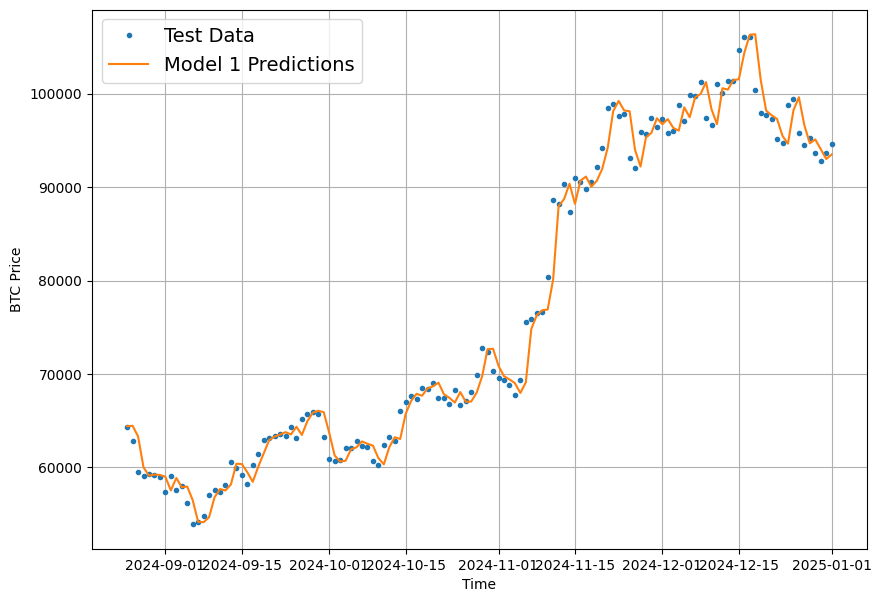

In [57]:
## plot our model_1 predictions
offset=600
plt.figure(figsize=(10,7))
## account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 end=None,
                 label="Test Data",
                 format=".")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 end=None,
                 label="Model 1 Predictions",
                 format="-")

## Conclusion

Based on the evaluation metrics, the Dense model (`model_1`) demonstrated slightly better performance compared to the Naive Forecast model. Specifically, the Dense model achieved lower values for MAE, MSE, RMSE, MAPE, and MASE on the test dataset. This indicates that the Dense model's predictions are, on average, closer to the actual Bitcoin prices and provide a more accurate forecast than simply using the previous day's price. The MASE value being less than 1 for the Dense model further supports that it is a better forecasting method than the naive baseline for this dataset.

## Model 2:Dense(window=30,horizon=1)

In [58]:
HORIZON=1 # predict one step at a time
WINDOW_SIZE=30 # use 30 timesteps in the past

In [59]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
full_windows.shape,full_labels.shape

((3624, 30), (3624, 1))

In [60]:
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2899, 2899, 725, 725)

In [61]:
model_2=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=80,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 8841.8721 - val_loss: 3515.1641
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1600.4452 - val_loss: 3478.4158
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1073.9796 - val_loss: 2290.0984
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 930.6272 - val_loss: 2588.5120
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 907.2960 - val_loss: 1946.5894
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 834.8757 - val_loss: 1864.8441
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 740.9371 - val_loss: 2041.2865
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 721.4849 - val_loss: 1820.8495
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 749.9314 - val_loss: 2392.5842
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 805.5788 - val_loss: 1687.8977
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 750.9131 - val_loss: 2583.3174
Epoch 12/80
23/

In [62]:
model_2.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 800.0780


1186.1331787109375

In [63]:
model_2=tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 653.9578


996.0185546875

In [64]:
model_2_preds=make_preds(model_2,test_windows)
model_2_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16982.238, 16993.555, 17077.012, 17238.492, 17572.809, 18421.715,
       19431.938, 20527.35 , 20972.049, 21260.836], dtype=float32)>

In [65]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels), # remove one dimension of test labels
                               y_pred=model_2_preds)
model_2_results

{'mae': np.float32(996.0186),
 'mse': np.float32(2324355.2),
 'rmse': np.float32(1524.5836),
 'mape': np.float32(1.9946939),
 'mase': np.float32(1.1281742)}

 Model 2 is performing worse than baseline

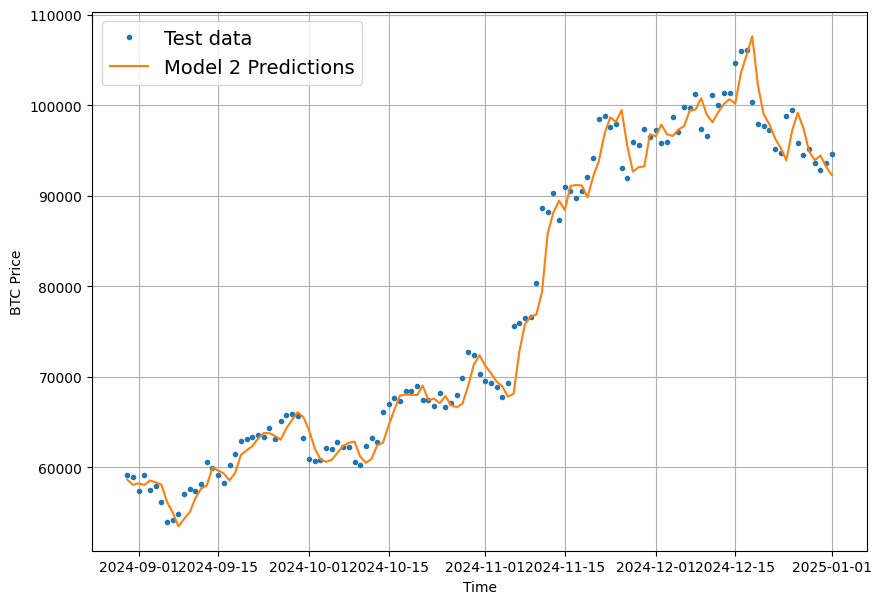

In [66]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],format=".",start=offset,label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,start=offset,label='Model 2 Predictions',format='-')

## Model 3 (window_size=30,horizon=7)

In [67]:
HORIZON=7 # predict one step at a time
WINDOW_SIZE=30 # use 30 timesteps in the past

In [68]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
full_windows.shape,full_labels.shape

((3618, 30), (3618, 7))

In [69]:
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2894, 2894, 724, 724)

In [70]:
model_3=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(x=train_windows,
            y=train_labels,
            epochs=80,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 10444.3750 - val_loss: 6079.0503
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1919.4578 - val_loss: 3864.7927
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1421.5481 - val_loss: 3102.6416
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1341.6569 - val_loss: 3199.7017
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1314.9274 - val_loss: 2851.4172
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1227.6543 - val_loss: 2781.7590
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1151.2128 - val_loss: 2626.2390
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1129.4869 - val_loss: 2539.5168
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1083.6851 - val_loss: 2448.6936
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1069.8380 - val_loss: 2416.5115
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1021.1993 - val_loss: 2348.5632
Epoch 

In [71]:
model_2.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1260.0284


1851.1937255859375

In [72]:
model_3=tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1285.4082


1858.4278564453125

In [73]:
model_3_preds=make_preds(model_3,test_windows)
model_3_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[16511.281, 16562.047, 16482.92 , 16604.223, 16531.328, 16545.99 ,
        16515.502],
       [16536.156, 16570.977, 16555.684, 16592.63 , 16519.111, 16507.492,
        16542.55 ],
       [16662.584, 16635.52 , 16702.342, 16719.781, 16690.877, 16641.39 ,
        16540.484],
       [16726.744, 16858.273, 16635.395, 16805.781, 16659.613, 16650.885,
        16649.693],
       [16756.004, 16939.43 , 16724.344, 16727.918, 16645.883, 16696.258,
        16641.318],
       [16739.938, 16957.3  , 16744.63 , 16825.594, 16759.057, 16795.395,
        16645.617],
       [16906.064, 17011.229, 16828.115, 16894.607, 16859.496, 16813.232,
        16883.807],
       [17035.633, 17041.611, 16984.559, 17142.854, 16947.584, 16955.463,
        16956.164],
       [17102.377, 17153.154, 16965.877, 17118.363, 17238.621, 17017.8  ,
        17036.592],
       [17379.195, 17496.78 , 17407.947, 17503.893, 17437.18 , 17295.18 ,
        17442.6  ]], dtype=floa

In [74]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels), # remove one dimension of test labels
                               y_pred=model_3_preds)
model_3_results

{'mae': array([  396.08734 ,   494.44922 ,   539.264   ,   773.0371  ,
         1175.178   ,  1704.1866  ,  2140.8245  ,  2584.9607  ,
         3035.3206  ,  3094.9146  ,  2527.767   ,  1948.0471  ,
         1097.0885  ,   914.7994  ,   946.4897  ,  1110.6771  ,
         1376.6906  ,  1418.5996  ,   570.0879  ,   176.26115 ,
          279.95172 ,   275.90094 ,   213.75697 ,   260.1649  ,
          401.17215 ,   356.40543 ,   429.65067 ,   324.81754 ,
          366.91797 ,   346.42438 ,   469.13617 ,   487.93723 ,
          907.8789  ,   939.09485 ,   886.03516 ,   922.1247  ,
         1207.0887  ,  1259.3544  ,   802.9707  ,   961.62164 ,
         1489.906   ,  1834.9735  ,  2385.7563  ,  2466.5386  ,
         1092.6094  ,  1082.7441  ,   487.77817 ,   447.0848  ,
          543.1811  ,   990.834   ,  1044.6708  ,  1009.1953  ,
          707.1833  ,   332.1473  ,   526.4157  ,   567.7921  ,
          592.28015 ,   665.55945 ,   876.9749  ,  1222.2109  ,
          844.6094  ,   953.95087

In [75]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [76]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': np.float32(1858.4279),
 'mse': np.float32(7947946.5),
 'rmse': np.float32(2134.0693),
 'mape': np.float32(3.8175218),
 'mase': np.float32(2.111405)}

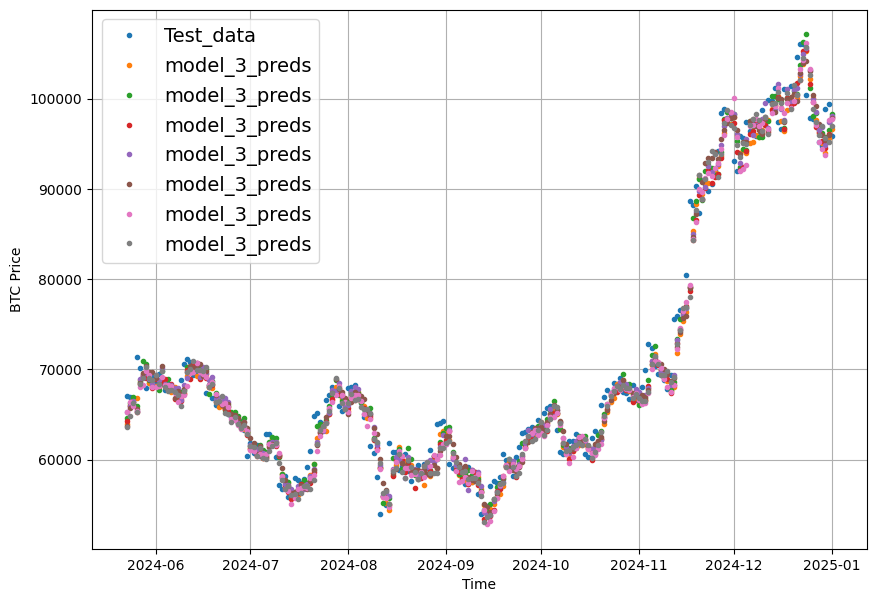

In [77]:
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

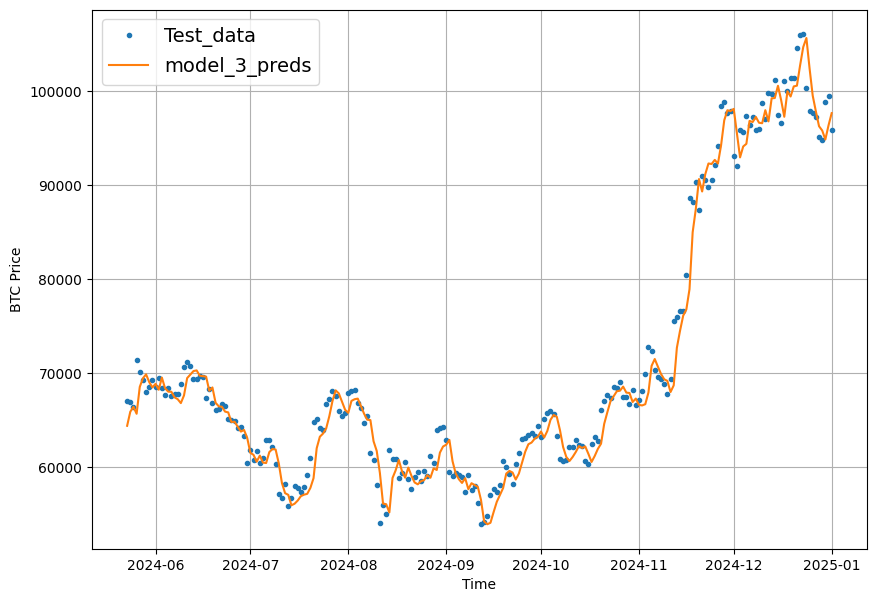

In [78]:
offset = 500
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

## Comparing models performance so far..


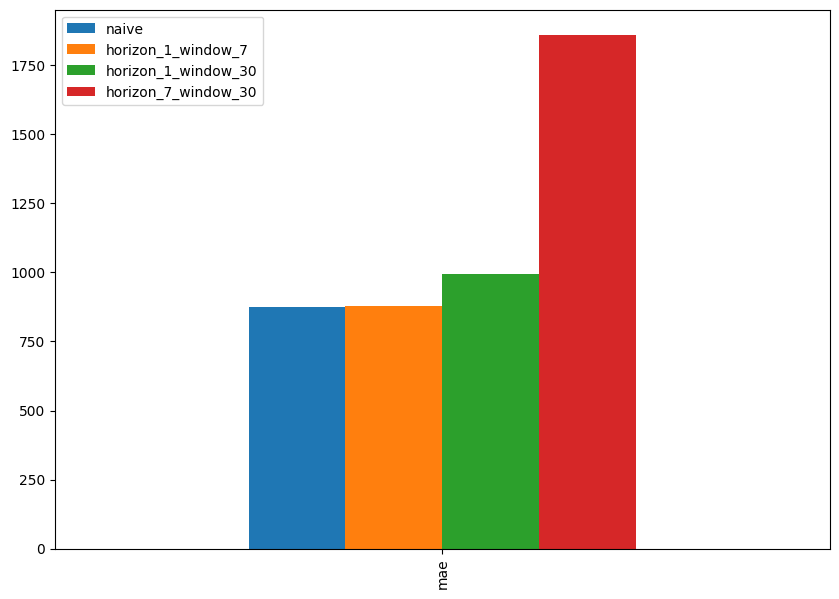

In [79]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## naive model is performing best but the dense model with a horizon of 1 and window size of 7 looks to be performing closest.
##  Because of this ,let's use HORIZON=1 and WINDOW_SIZE=7 for our next series modelling

## Model 4: Conv1D

In [80]:
WINDOW_SIZE=7
HORIZON=1

In [81]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3647, 3647)

In [82]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2917, 730, 2917, 730)

In [83]:
train_windows[0].shape

(7,)

In [84]:
x=tf.constant(train_windows[0])
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1)) ## add an extra dimension for timesteps
print(f"Original shape:{x.shape}") ## window size
print(f"Expanded shape : {expand_dims_layer(x).shape}") ## (window_size,input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape:(7,)
Expanded shape : (7, 1)
Original values with expanded shape:
 [[314.136]
 [315.207]
 [284.234]
 [264.201]
 [274.57 ]
 [285.835]
 [293.909]]


In [85]:
train_windows = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(train_windows)
test_windows = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(test_windows)
train_windows.shape

TensorShape([2917, 1, 7])

In [86]:
model_4=tf.keras.Sequential([
    layers.Conv1D(filters=128,kernel_size=5,padding="causal",activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_4_conv1D")

## compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
## fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [87]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [88]:
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1D.keras")
model_4.evaluate(test_windows,test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 577.9139


893.4176635742188

In [89]:
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16660.99 , 16690.709, 16827.904, 16848.873, 16947.63 , 16964.854,
       17058.861, 17185.408, 17397.941, 17848.613], dtype=float32)>

In [90]:
model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)
model_4_results

{'mae': np.float32(893.41754),
 'mse': np.float32(1998188.0),
 'rmse': np.float32(1413.5728),
 'mape': np.float32(1.7826511),
 'mase': np.float32(1.0181991)}

## Model 5:RNN(LSTM)

In [91]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3647, 3647)

In [92]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2917, 730, 2917, 730)

In [93]:
train_windows = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(train_windows)
test_windows = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(test_windows)
train_windows.shape

TensorShape([2917, 1, 7])

In [94]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(1,WINDOW_SIZE))

# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(inputs) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [95]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 582.4529


898.1382446289062

In [96]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16661.08 , 16679.373, 16819.465, 16849.186, 16935.547, 16963.713,
       17051.145, 17175.695, 17387.145, 17828.424], dtype=float32)>

In [97]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': np.float32(898.1382),
 'mse': np.float32(2004554.5),
 'rmse': np.float32(1415.8229),
 'mape': np.float32(1.794418),
 'mase': np.float32(1.023579)}

## Mulitvariate Time Series

In [98]:

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset
block_reward_2 = 25 # 28 November 2012 = this block reward isn't in our dataset
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
block_reward_5= 3.125 ## 20 april 2024

# Block reward dates (datetime form of the above date stamps)
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
block_reward_5_datetime = np.datetime64("2024-04-20")

In [99]:
bitcoin_prices.index[0]

Timestamp('2015-01-01 00:00:00')

In [100]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_4_days=(block_reward_5_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days,block_reward_4_days

(555, 1957, 3397)

In [101]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

## set values of block_reward column(it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days,-1]=block_reward_4
bitcoin_prices_block.iloc[block_reward_4_days:,-1]=block_reward_5
bitcoin_prices_block.head(-5)

,Price(USD),block_reward
Start,,
2015-01-01,314.136,25
2015-01-02,315.207,25
2015-01-03,284.234,25
2015-01-04,264.201,25
2015-01-05,274.570,25
...,...,...
2024-12-23,94748.020,3.125
2024-12-24,98805.900,3.125
2024-12-25,99436.000,3.125


In [102]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price(USD)","block_reward"]]), ## we need to scale the data first
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index)
scaled_price_block_df.head(-5)

,Price(USD),block_reward
Start,,
2015-01-01,0.001278,1.0
2015-01-02,0.001288,1.0
2015-01-03,0.000996,1.0
2015-01-04,0.000807,1.0
2015-01-05,0.000905,1.0
...,...,...
2024-12-23,0.893231,0.0
2024-12-24,0.931559,0.0
2024-12-25,0.937510,0.0


<Axes: xlabel='Start'>

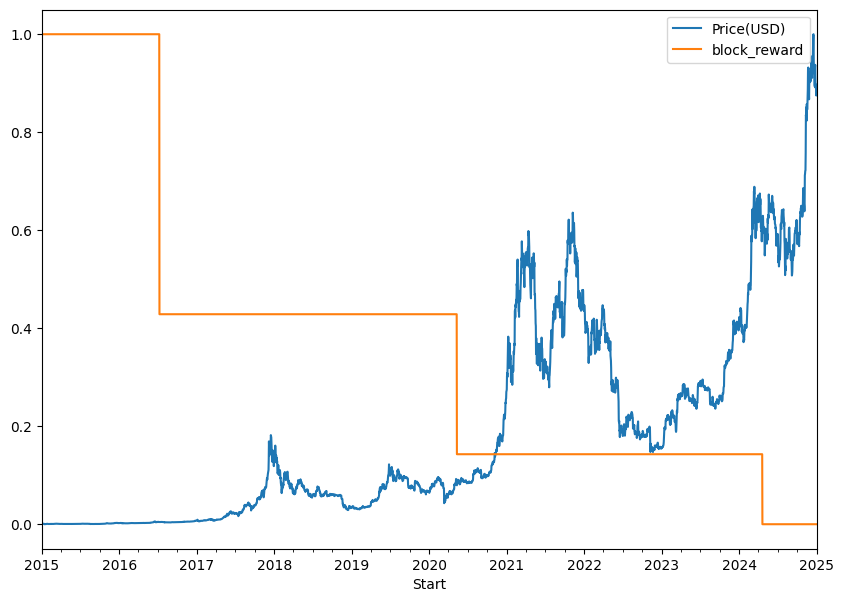

In [103]:
scaled_price_block_df.plot(figsize=(10,7))

In [104]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [105]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price(USD)+{i+1}"] = bitcoin_prices_windowed["Price(USD)"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price(USD),block_reward,Price(USD)+1,Price(USD)+2,Price(USD)+3,Price(USD)+4,Price(USD)+5,Price(USD)+6,Price(USD)+7
Start,,,,,,,,,
2015-01-01,314.136,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.207,25,314.136,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,284.234,25,315.207,314.136,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.201,25,284.234,315.207,314.136,NaN,NaN,NaN,NaN
2015-01-05,274.570,25,264.201,284.234,315.207,314.136,NaN,NaN,NaN
2015-01-06,285.835,25,274.570,264.201,284.234,315.207,314.136,NaN,NaN
2015-01-07,293.909,25,285.835,274.570,264.201,284.234,315.207,314.136,NaN
2015-01-08,283.500,25,293.909,285.835,274.570,264.201,284.234,315.207,314.136
2015-01-09,290.408,25,283.500,293.909,285.835,274.570,264.201,284.234,315.207


In [106]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price(USD)", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price(USD)"].astype(np.float32)
X.head()

,block_reward,Price(USD)+1,Price(USD)+2,Price(USD)+3,Price(USD)+4,Price(USD)+5,Price(USD)+6,Price(USD)+7
Start,,,,,,,,
2015-01-08,25.0,293.908997,285.834991,274.570007,264.200989,284.234009,315.207001,314.135986
2015-01-09,25.0,283.500000,293.908997,285.834991,274.570007,264.200989,284.234009,315.207001
2015-01-10,25.0,290.407990,283.500000,293.908997,285.834991,274.570007,264.200989,284.234009
2015-01-11,25.0,274.696991,290.407990,283.500000,293.908997,285.834991,274.570007,264.200989
2015-01-12,25.0,267.880005,274.696991,290.407990,283.500000,293.908997,285.834991,274.570007


In [107]:
y.head()

,Price(USD)
Start,
2015-01-08,283.500000
2015-01-09,290.407990
2015-01-10,274.696991
2015-01-11,267.880005
2015-01-12,267.940002


In [108]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2917, 8), (2917,), (730, 8), (730,))

## Model 6 : Dense(Multivariate time series)

In [109]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [110]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 575.4931


876.7036743164062

In [111]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16664.04 , 16677.562, 16844.883, 16822.41 , 16951.695, 16937.912,
       17063.914, 17183.328, 17420.25 , 17908.375], dtype=float32)>

In [112]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': np.float32(876.7037),
 'mse': np.float32(1917505.8),
 'rmse': np.float32(1384.7402),
 'mape': np.float32(1.7536249),
 'mase': np.float32(0.9991508)}

In [113]:
model_1_results

{'mae': np.float32(877.8601),
 'mse': np.float32(1925194.1),
 'rmse': np.float32(1387.5137),
 'mape': np.float32(1.7588973),
 'mase': np.float32(1.0004687)}

N-BEATS Algorithm

In [114]:
import keras

In [115]:
keras.saving.get_custom_objects().clear()

@keras.saving.register_keras_serializable(package="NBeatsBlock")
class NBeatsBlock(keras.layers.Layer):
  def __init__(self, ## the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): ## the **kwargs argument takes care of all of the arguments for the parent class (input_shape,trainable,name)
    super(NBeatsBlock,self).__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    ## Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    ## output of block is a theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):## the call method is what runs when the layer is called
    x=inputs
    for layer in self.hidden: ## pass inputs through each hidden layer
      x=layer(x)
    theta=self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast=theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast,forecast

  def get_config(self):
    config=super().get_config()
    config.update({
        "input_size":self.input_size,
        "theta_size":self.theta_size,
        "horizon":self.horizon,
        "n_neurons":self.n_neurons,
        "n_layers":self.n_layers,
        "hidden":self.hidden,
        "theta_layer":self.theta_layer
    })
    return config

  @classmethod
  def from_config(cls,config):
    config['hidden']=keras.layers.deserialize(config['hidden'])
    config['theta_layer']=keras.layers.deserialize(config['theta_layer'])
    return cls(**config)

In [116]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [117]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [118]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.02968774 -0.18387416 -0.24428841 -0.69231284 -0.4694484  -0.83228076
  0.15926312]
Forecast: -0.058858804404735565


In [119]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [120]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price(USD)+{i+1}"] = bitcoin_prices_nbeats["Price(USD)"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price(USD),Price(USD)+1,Price(USD)+2,Price(USD)+3,Price(USD)+4,Price(USD)+5,Price(USD)+6,Price(USD)+7
Start,,,,,,,,
2015-01-08,283.500,293.909,285.835,274.570,264.201,284.234,315.207,314.136
2015-01-09,290.408,283.500,293.909,285.835,274.570,264.201,284.234,315.207
2015-01-10,274.697,290.408,283.500,293.909,285.835,274.570,264.201,284.234
2015-01-11,267.880,274.697,290.408,283.500,293.909,285.835,274.570,264.201
2015-01-12,267.940,267.880,274.697,290.408,283.500,293.909,285.835,274.570


In [121]:
X = bitcoin_prices_nbeats.dropna().drop("Price(USD)", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price(USD)"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2917, 2917, 730, 730)

In [122]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [123]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [124]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [125]:
# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - loss: 46332.7461 - mae: 46332.7461 - mse: 5522024448.0000 - val_loss: 20359.2051 - val_mae: 20359.2051 - val_mse: 505130400.0000 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 15813.0400 - mae: 15813.0400 - mse: 628964864.0000 - val_loss: 23487.5449 - val_mae: 23487.5449 - val_mse: 675391744.0000 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 2089.3596 - mae: 2089.3596 - mse: 10133228.0000 - val_loss: 8473.0518 - val_mae: 8473.0518 - val_mse: 88715440.0000 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1530.8131 - mae: 1530.8131 - mse: 8459657.0000 - val_loss: 14113.5098 - val_mae: 14113.5098 - val_mse: 242639088.0000 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 3620.8047 - mae: 3620.8047 - mse: 44915908.0000 - val_loss: 2384.1011 - val_mae: 2384.1011 - val_mse: 11619966.0000 - learning_

In [126]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 864.6577 - mae: 864.6577 - mse: 1856942.5000


[864.65771484375, 864.65771484375, 1856942.5]

In [127]:
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16680.916, 16671.496, 16841.63 , 16824.068, 16923.367, 16931.262,
       17041.95 , 17176.424, 17410.51 , 17912.543], dtype=float32)>

In [128]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


{'mae': np.float32(864.6576),
 'mse': np.float32(1856942.5),
 'rmse': np.float32(1362.6968),
 'mape': np.float32(1.740968),
 'mase': np.float32(0.9854223)}

In [132]:
# plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)

Ensemble model

In [137]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [139]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 130: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 805: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 905: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 126: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 297: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 830: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 930: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 459: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 559: ReduceLROnPl

In [140]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [141]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


<tf.Tensor: shape=(15, 730), dtype=float32, numpy=
array([[16674.535, 16677.857, 16880.666, ..., 93873.49 , 93104.99 ,
        93367.32 ],
       [16691.855, 16697.822, 16858.738, ..., 94034.   , 92724.87 ,
        93444.66 ],
       [16666.082, 16671.662, 16839.953, ..., 93718.51 , 92981.44 ,
        93445.2  ],
       ...,
       [16686.848, 16700.816, 16861.709, ..., 93835.81 , 92906.01 ,
        93259.695],
       [16683.232, 16657.568, 16808.924, ..., 94160.086, 93016.984,
        93598.625],
       [16683.215, 16687.906, 16860.566, ..., 94032.9  , 93358.914,
        93752.81 ]], dtype=float32)>

In [142]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': np.float32(871.9088),
 'mse': np.float32(1877096.1),
 'rmse': np.float32(1370.0715),
 'mape': np.float32(1.7473565),
 'mase': np.float32(0.99368626)}

In [143]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Model 9 : Training on all data

In [144]:
bitcoin_prices_windowed.head()

,Price(USD),block_reward,Price(USD)+1,Price(USD)+2,Price(USD)+3,Price(USD)+4,Price(USD)+5,Price(USD)+6,Price(USD)+7
Start,,,,,,,,,
2015-01-01,314.136,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.207,25,314.136,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,284.234,25,315.207,314.136,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.201,25,284.234,315.207,314.136,NaN,NaN,NaN,NaN
2015-01-05,274.570,25,264.201,284.234,315.207,314.136,NaN,NaN,NaN


In [145]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price(USD)", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price(USD)"].to_numpy()

In [146]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [147]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [148]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [205]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [206]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicting on: 
 [95830.42 94452.57 95204.07 93659.56 92811.03 93647.01 94610.14] -> Prediction: 94574.8125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicting on: 
 [94452.57   95204.07   93659.56   92811.03   93647.01   94610.14
 94574.8125] -> Prediction: 93831.328125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicting on: 
 [95204.07     93659.56     92811.03     93647.01     94610.14
 94574.8125   93831.328125] -> Prediction: 93511.984375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicting on: 
 [93659.56     92811.03     93647.01     94610.14     94574.8125
 93831.328125 93511.984375] -> Prediction: 92573.6796875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicting on: 
 [92811.03      93647.01      94610.14      94574.8125    93831.328125
 93511.984375  92573.6796875] -> Prediction: 92645.484375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicting on: 
 [93647.01      94610.14      94574.8125    93831.328125  93511.984375
 92573.6796875 92645.484375 ] -

In [208]:
future_forecast

[np.float32(94574.81),
 np.float32(93831.33),
 np.float32(93511.984),
 np.float32(92573.68),
 np.float32(92645.484),
 np.float32(93290.086),
 np.float32(93580.19),
 np.float32(93405.875),
 np.float32(92742.125),
 np.float32(92293.84),
 np.float32(91940.03),
 np.float32(92217.28),
 np.float32(92585.33),
 np.float32(92565.3)]

In [209]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [210]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2025-01-01 00:00:00')

In [211]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05',
       '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
       '2025-01-10', '2025-01-11', '2025-01-12', '2025-01-13',
       '2025-01-14', '2025-01-15'], dtype='datetime64[D]')

In [212]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2015-01-01_2025-01-01.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

  timesteps.reverse()
  btc_price.reverse()

In [213]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
        '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
        '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
        '2025-01-13', '2025-01-14', '2025-01-15'], dtype='datetime64[D]'),
 array([93650.83 , 94574.81 , 93831.33 , 93511.984, 92573.68 , 92645.484,
        93290.086, 93580.19 , 93405.875, 92742.125, 92293.84 , 91940.03 ,
        92217.28 , 92585.33 , 92565.3  ], dtype=float32))

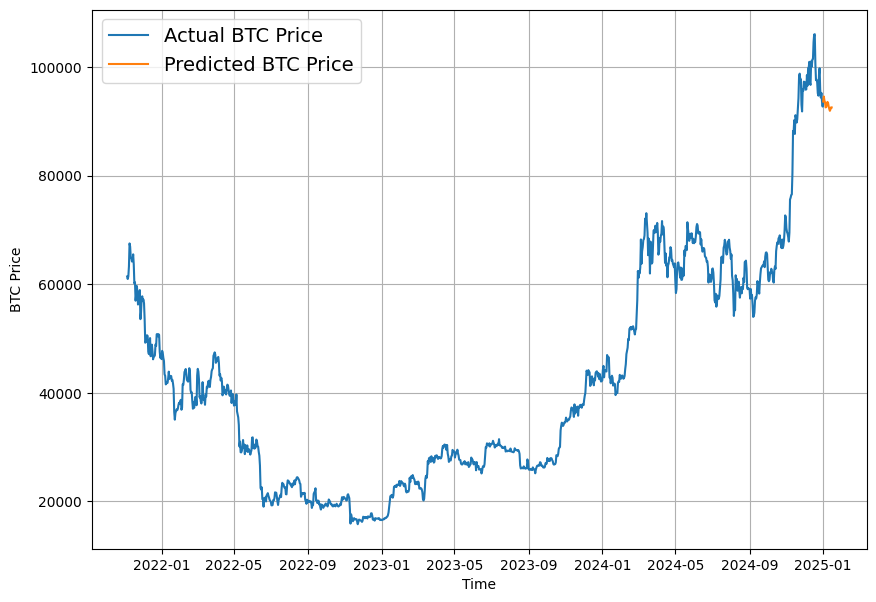

In [214]:
plt.figure(figsize=(10, 7))
plot_time_series(np.array(bitcoin_prices.index), np.array(btc_price), start=2500, format="-", label="Actual BTC Price")
plot_time_series(np.array(next_time_steps), np.array(future_forecast), format="-", label="Predicted BTC Price")

Model 10

In [215]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [216]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[95181.3,
 94736.64,
 98612.37,
 99792.0,
 95848.07,
 94394.88,
 95233.87,
 93610.59,
 92728.07,
 936.5083]

In [217]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2024-12-23T00:00:00.000000000', '2024-12-24T00:00:00.000000000',
       '2024-12-25T00:00:00.000000000', '2024-12-26T00:00:00.000000000',
       '2024-12-27T00:00:00.000000000', '2024-12-28T00:00:00.000000000',
       '2024-12-29T00:00:00.000000000', '2024-12-30T00:00:00.000000000',
       '2024-12-31T00:00:00.000000000', '2025-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

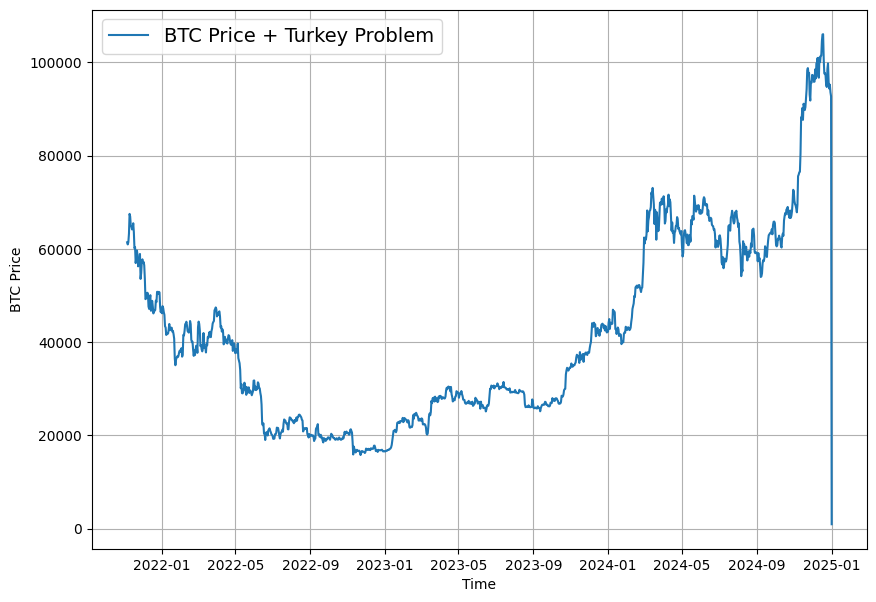

In [218]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [220]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, y_train, X_test, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2917, 730, 2917, 730)

In [229]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model._name)])

In [230]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 600.4215 - mae: 600.4215


[1019.1553955078125, 1019.1553955078125]

In [231]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model.keras")
turkey_model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 584.4828


998.3692016601562

In [232]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16622.768, 16689.021, 16693.46 , 16849.734, 16857.28 , 16956.066,
       16964.879, 17115.602, 17193.562, 17433.463], dtype=float32)>

In [233]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': np.float32(998.36926),
 'mse': np.float32(13454531.0),
 'rmse': np.float32(998.36926),
 'mape': np.float32(15.193416),
 'mase': np.float32(23.910784)}

In [235]:
model_1_results


{'mae': np.float32(877.8601),
 'mse': np.float32(1925194.1),
 'rmse': np.float32(1387.5137),
 'mape': np.float32(1.7588973),
 'mase': np.float32(1.0004687)}

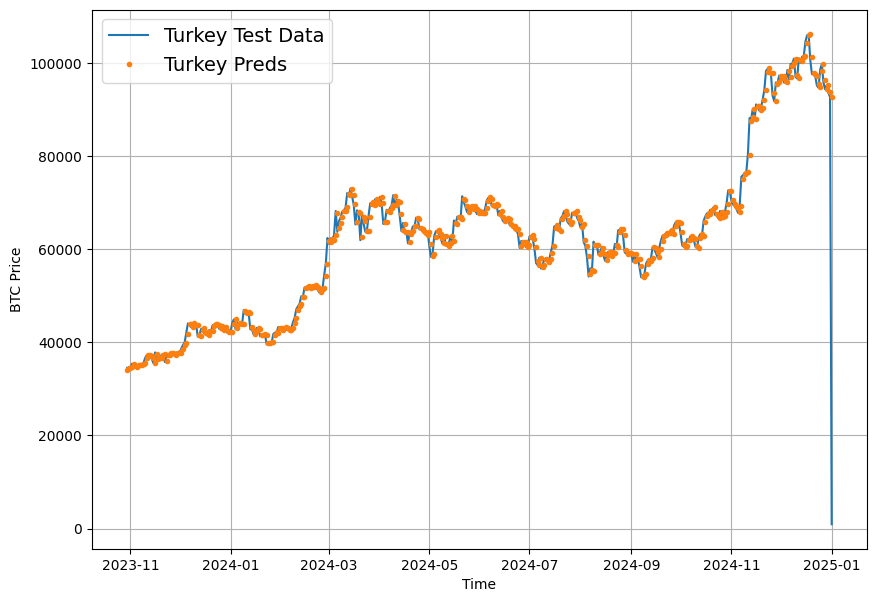

In [236]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

### Compare Models

In [237]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,876.248901,1.897834e+06,1377.618896,1.756271,0.998633
model_1_dense_w7_h1,877.860107,1.925194e+06,1387.513672,1.758897,1.000469
model_2_dense_w30_h1,996.018616,2.324355e+06,1524.583618,1.994694,1.128174
model_3_dense_w30_h7,1858.427856,7.947946e+06,2134.069336,3.817522,2.111405
model_4_CONV1D,893.417542,1.998188e+06,1413.572754,1.782651,1.018199
model_5_LSTM,898.138184,2.004554e+06,1415.822876,1.794418,1.023579
model_6_multivariate,876.703674,1.917506e+06,1384.740234,1.753625,0.999151
model_8_NBEATs,864.657593,1.856942e+06,1362.696777,1.740968,0.985422
model_9_ensemble,871.908813,1.877096e+06,1370.071533,1.747357,0.993686
model_10_turkey,998.369263,1.345453e+07,998.369263,15.193416,23.910784


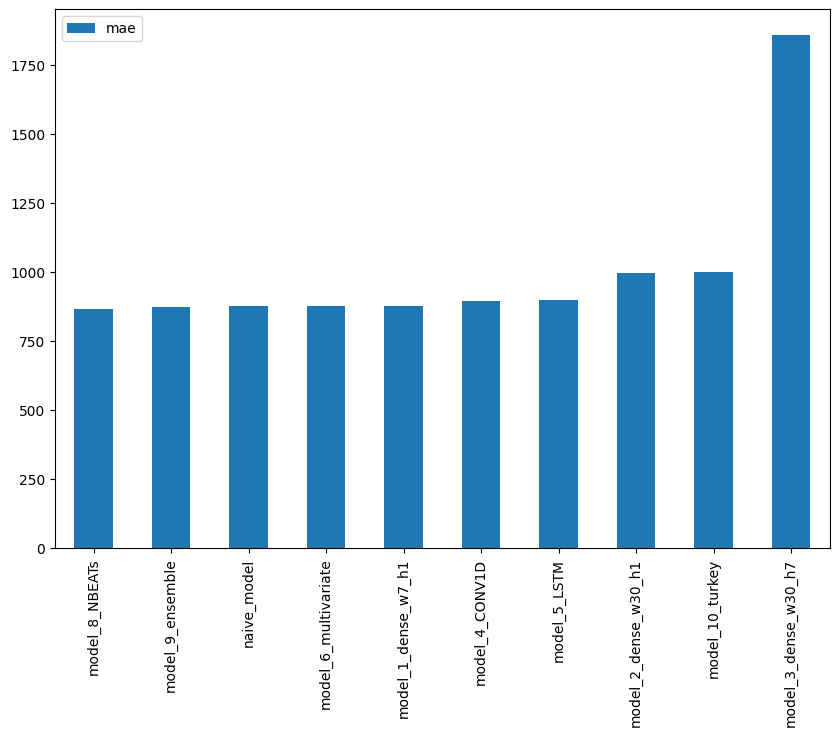

In [238]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");